# EDA for Jennifer Montgomery

### Buyer: High budget, wants to show off, timing within a month, waterfront, renovated, high grades, resell within 1 year.

## Setup and Import

In [20]:
import plotly.express as px


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd # Import packages
csv_file_path = 'C:\\Users\\fr33c\\OneDrive\\Desktop\\AIPM\\ds-EDA-C-and-R\\data\\eda.csv' # Path to the CSV file
df = pd.read_csv(csv_file_path) # Read the CSV file into a DataFrame
print(df.head()) # Display the first few rows of the DataFrame

         date      price    house_id  bedrooms  sqft_living  view  grade  \
0  2014-09-08   905000.0  1483300570       4.0       3300.0   0.0      7   
1  2014-10-07  1090000.0  2450000295       3.0       2920.0   0.0      8   
2  2015-03-02  1450000.0  4389200955       4.0       2750.0   0.0      8   
3  2015-02-21  1510000.0    46100204       5.0       3300.0   3.0      9   
4  2015-05-13  2050000.0  7424700045       5.0       3830.0   1.0      9   

   yr_renovated  zipcode  waterfront  
0         19910    98040         0.0  
1         20100    98004         0.0  
2         19920    98004         0.0  
3         19910    98040         NaN  
4         19940    98122         0.0  


## Examining the Data

In [22]:
# Examine the usual suspects: head, tail, unique values etc.
# Show the first 5 rows
print(df.head())

# Show the last 5 rows
print(df.tail())

# Show summary info (including datatypes and non-null counts)
print(df.info())

# Show basic statistics for numerical columns
print(df.describe())

# List all column names
print(df.columns)

# Get the number of unique values per column
print(df.nunique())

# Check for missing values per column
print(df.isnull().sum())

         date      price    house_id  bedrooms  sqft_living  view  grade  \
0  2014-09-08   905000.0  1483300570       4.0       3300.0   0.0      7   
1  2014-10-07  1090000.0  2450000295       3.0       2920.0   0.0      8   
2  2015-03-02  1450000.0  4389200955       4.0       2750.0   0.0      8   
3  2015-02-21  1510000.0    46100204       5.0       3300.0   3.0      9   
4  2015-05-13  2050000.0  7424700045       5.0       3830.0   1.0      9   

   yr_renovated  zipcode  waterfront  renovated  
0         19910    98040         0.0  Renovated  
1         20100    98004         0.0  Renovated  
2         19920    98004         0.0  Renovated  
3         19910    98040         NaN  Renovated  
4         19940    98122         0.0  Renovated  
           date      price    house_id  bedrooms  sqft_living  view  grade  \
195  2014-07-14  1520000.0  2397100705       4.0       3650.0   0.0      9   
196  2014-08-20  2160000.0  5553300375       3.0       3080.0   3.0     11   
197  2014

# Visualisations

## Correlation Between Features

This heatmap shows how key features relate to each other. Price is strongly positively correlated with home size (sqft_living), quality (grade), and view. Bedrooms and year renovated have moderate positive correlations with price. Waterfront status also boosts price but not as much as we expected. Zipcode shows little direct correlation but represents location differences.



Text(0.5, 1.0, 'Correlation Heatmap')

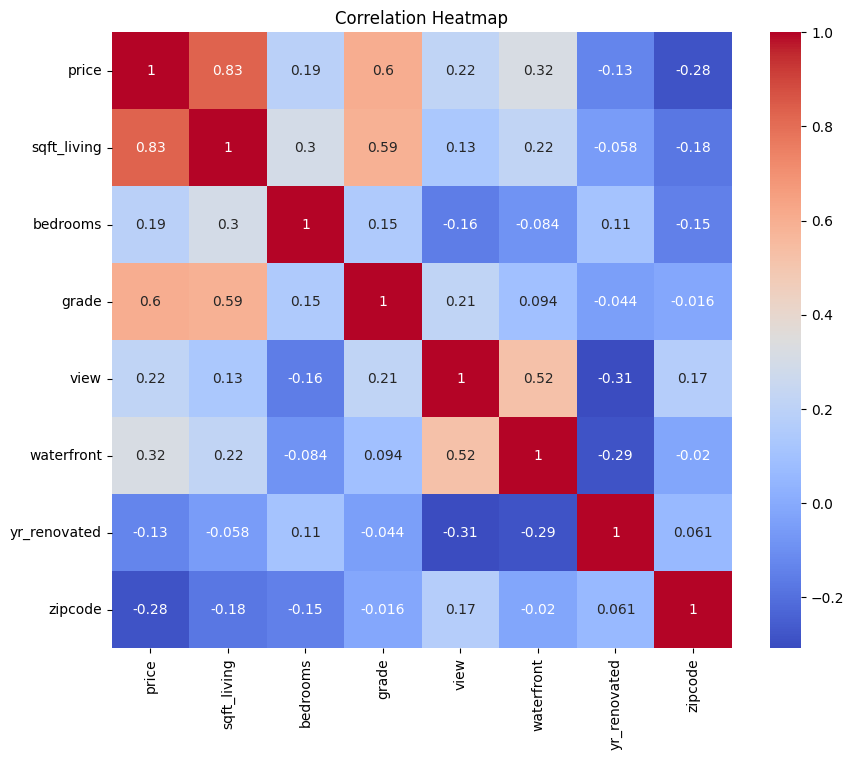

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['price', 'sqft_living', 'bedrooms', 'grade', 'view', 'waterfront', 'yr_renovated', 'zipcode']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

## Average Home Price by Zip Code

### Impact of Zip Code on Prices:
This visualization displays the average home prices across different zip codes, providing a high-level overview of how housing prices vary geographically. Each bar represents the mean price of homes sold within a specific zip code, offering a quick comparison across regions.

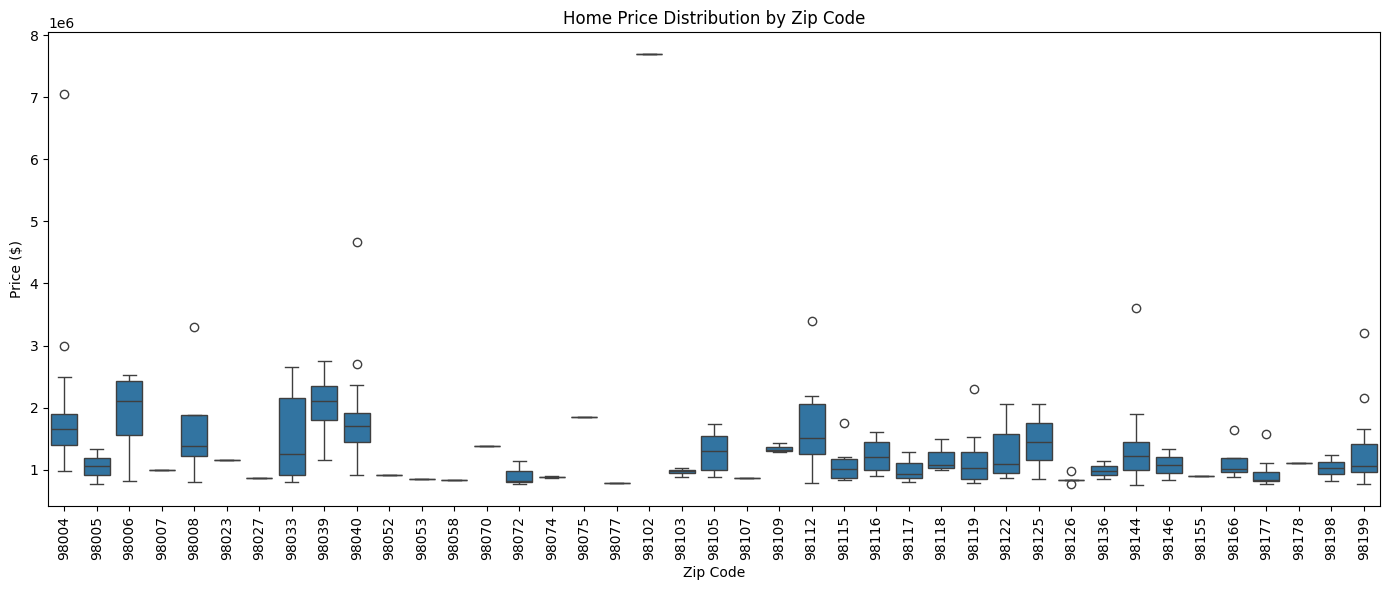

In [24]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='zipcode', y='price')  # assuming df has individual records
plt.xticks(rotation=90)
plt.title('Home Price Distribution by Zip Code')
plt.ylabel('Price ($)')
plt.xlabel('Zip Code')
plt.tight_layout()
plt.show()


# 41 Zipcodes we filtered: 98004, 98005, 98006, 98007, 98008, 98023, 98027, 98033, 98039. 98040, 98052, 98053, 98058, 98070, 98072, 98074, 98075, 98077, 98102, 98103, 98105, 98107, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98136, 98144, 98146, 98155, 98166, 98177, 98178, 98198, 98199. 

### Waterfront vs Non-Waterfront Prices:
Waterfront homes generally have higher prices compared to non-waterfront homes, confirming the premium buyers place on waterfront access.
The median price (the middle line of the box) for waterfront properties is noticeably higher.

The price range for waterfront homes is wider, showing more variability — some very expensive homes but also some more affordable ones.

Using the log scale on the price axis helps to see the distribution clearly since house prices can vary a lot.

Conclusion:
Waterfront location significantly increases house prices in this dataset, but prices also vary widely, likely depending on other factors like size, grade, renovation, etc.

In [25]:
fig = px.histogram(
    df, 
    x='price', 
    color='waterfront',
    barmode='overlay',  # or 'group' for side-by-side
    histnorm='density',  # normalize to show distribution
    nbins=50,
    log_y=True,  # log scale for better readability
    labels={'waterfront': 'Waterfront', 'price': 'Price ($)'},
    title='Price Distribution: Waterfront vs Non-Waterfront'
)

fig.update_traces(opacity=0.6)
fig.update_layout(
    legend_title_text='Waterfront',
    xaxis_title='Price ($)',
    yaxis_title='Density',
)
fig.update_xaxes(type='log')  # log scale for x-axis (prices)
fig.show()


## Distribution of Home Prices Across Property Grade

This plot will help you visualize how prices vary across different property grades. Higher grades generally show higher price ranges and medians, and using a log scale will make the distribution clearer by minimizing the impact of extreme outliers.

C:\Users\fr33c\AppData\Local\Temp\ipykernel_4800\2448435973.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




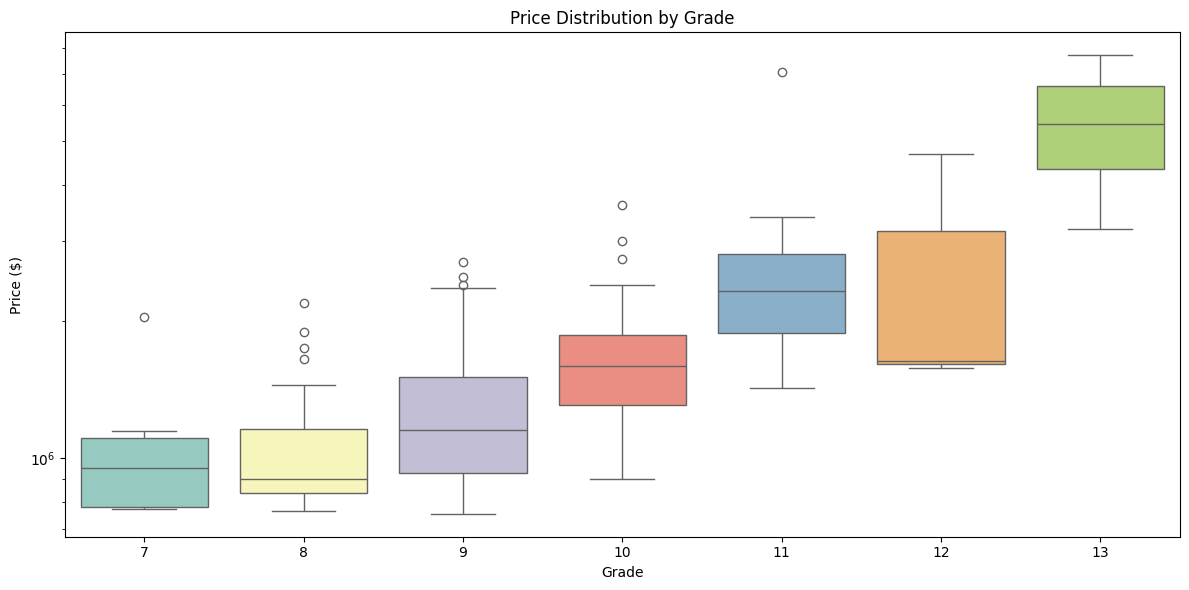

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='grade', y='price', palette='Set3')  # Try 'Set3', 'Spectral', or 'husl'
plt.title('Price Distribution by Grade')
plt.xlabel('Grade')
plt.ylabel('Price ($)')
plt.yscale('log')  # Log scale helps manage outliers
plt.tight_layout()
plt.show()



## Grade vs. Year Renovated

This scatter plot shows the relationship between the grade of the house (which indicates construction quality and design) and the year it was renovated for waterfront properties that meet Jennifer’s criteria. Each point represents a home, colored by its price.

This plot highlights the importance of both renovation recency and home grade in influencing the price for waterfront properties. Recently renovated doesn’t mean better grade or higher Price, there is no direct correlation.



In [33]:
jennifer_filtered = df[
    (df['waterfront'] == 1) &
    (df['yr_renovated'] > 0) &
    (df['price'] > 750_000)
]


In [34]:
fig = px.scatter(
    jennifer_filtered,
    x='grade',
    y='yr_renovated',
    color='price',           # Color shows price
    size=[10]*len(jennifer_filtered),  # Fixed bubble size (all bubbles size 10)
    hover_name='zipcode',
    hover_data=['bedrooms', 'sqft_living'],
    title='Grade vs. Year Renovated',
    size_max=10              # Maximum size (matches fixed size)
)

fig.update_layout(
    xaxis_title='Grade',
    yaxis_title='Year Renovated'
)

fig.show()


## Home Price Distribution Based on Renovation Status

This box plot confimrs that the renovation status of a home doesn't seem to affect the price of the home. This suggests that renovation alone may not significantly drive price increases and other features (like location, grade, or size) likely play a larger role in determining home value.

C:\Users\fr33c\AppData\Local\Temp\ipykernel_4800\370947453.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




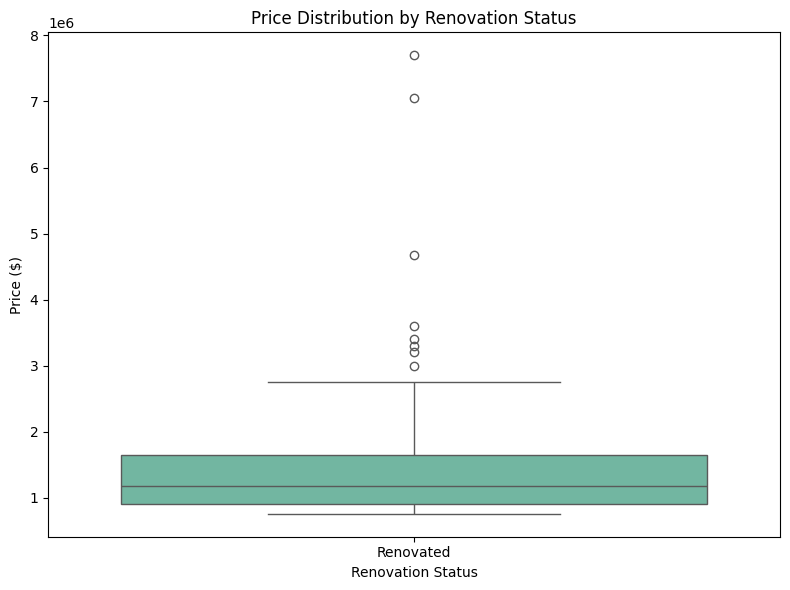

In [35]:
# Create a renovation status column
df['renovated'] = df['yr_renovated'].apply(lambda x: 'Renovated' if x > 0 else 'Not Renovated')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='renovated', y='price', palette='Set2')

plt.title('Price Distribution by Renovation Status')
plt.xlabel('Renovation Status')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()



## Scatter Plot for Jennifer’s Criteria

Homes that are:

* Waterfront
* Renovated in the last 10 years
* At least 3 bedrooms
* 2500 sqft
* $750,000

#### Positive Correlation between sqft_living and price:

As expected, larger homes tend to be more expensive.
There’s a general upward trend: more space = higher cost. We also notice 2 outliners with great living space.

#### Variation in Price Across Zip Codes:

Some zip codes (like 98004, 98039, 98040) have consistently higher price clusters, even for similar square footage.
Indicates location premium — not just home size.

#### Grade Influences Value:

High Grade tends to be at the higher end of the price spectrum.
This supports that higher construction quality or design features (grade) are highly valued.

#### Year Renovated in Hover Data:

Helps confirm that recently renovated properties don't always command top prices.
You can spot renovation recency and tie it to price differences.

In [37]:
df = pd.read_csv(r'c:\Users\fr33c\OneDrive\Desktop\AIPM\ds-EDA-C-and-R\data\eda.csv')

# Then you can filter and plot:
jennifer_df = df[
    (df['waterfront'] == 1) &
    (df['yr_renovated'] > 0) &
    (df['bedrooms'] >= 3) &
    (df['sqft_living'] > 2500) &
    (df['price'] > 750_000)
]

fig = px.scatter(
    jennifer_df,
    x='sqft_living',
    y='price',
    color='grade',
    size='grade',
    hover_data=['bedrooms', 'grade', 'yr_renovated', 'zipcode'],
    title='High-End Renovated Waterfront Properties'
)

fig.show()


## Jennifer Montgomery Match Table

Top 10 properties matching all Jennifer’s criteria.

In [38]:
# Build the display table including house_id
jennifer_match_table = jennifer_filtered[[
    'house_id',
    'date',
    'price',
    'zipcode',
    'bedrooms',
    'sqft_living',
    'grade',
    'yr_renovated',
    'view',
    'waterfront'
]].sort_values(by='price', ascending=False)

# Format
jennifer_match_table['price'] = jennifer_match_table['price'].map('${:,.0f}'.format)
jennifer_match_table['date'] = pd.to_datetime(jennifer_match_table['date']).dt.date

# Show top 10
jennifer_match_table.head(10)



,house_id,date,price,zipcode,bedrooms,sqft_living,grade,yr_renovated,view,waterfront
37,9808700762,2014-06-11,"$7,060,000",98004,5.0,10040.0,11,20010,2.0,1.0
81,1924059029,2014-06-17,"$4,670,000",98040,5.0,9640.0,12,20090,4.0,1.0
25,4114601570,2014-11-18,"$3,600,000",98144,3.0,5020.0,10,20020,4.0,1.0
180,3625059152,2014-12-30,"$3,300,000",98008,3.0,4220.0,11,19870,4.0,1.0
70,5442300807,2014-06-24,"$2,700,000",98040,5.0,3831.0,9,19800,4.0,1.0
173,7352200450,2015-01-15,"$2,050,000",98125,4.0,3580.0,7,19650,4.0,1.0
123,4114601580,2014-07-24,"$1,900,000",98144,6.0,3020.0,8,19830,4.0,1.0
48,9201300050,2014-08-14,"$1,850,000",98075,5.0,2800.0,9,20010,4.0,1.0
88,3343302110,2015-03-06,"$1,800,000",98006,3.0,2790.0,10,19890,4.0,1.0
155,6117502230,2014-12-01,"$1,640,000",98166,3.0,4660.0,12,19900,4.0,1.0


# Key Insights for Jennifer Montgomery from the Housing Data

1. **Waterfront Homes Are Pricier**
    * The average price of waterfront homes is about $2.27 million, compared to $1.34 million for non-waterfront properties.
    * This confirms that waterfront homes command a significant price premium—a strong point for showing off and likely resale value.

2. **Square Foot Living and Grade Strongly Influence Price**
    * The correlation with price is highest for square footage (0.83) and grade (0.60.)
3. **High-End Grades Are Rare and Valuable**
    * At the top end, only 2 homes have grade 13 and 3 have grade 12, while grades 9 and 10 are most common among luxury listings.
    * Higher grades (10, 11, 12, 13) sharply increase average price—grade 13 homes average over $5.4 million, while grade 11 averages $2.7 million.
4. **Renovation Isn’t Directly Linked to Higher Prices**
    * Recent renovations show a slightly negative correlation with price overall (-0.13).
    * This suggests that, for this market, factors like grade, size, and location have more weight than renovation date alone—unless combined with high grade or waterfront status.


# Recommendations for Jennifer Montgomery

---

#### 1. **House ID: 1924059029**

* **Zipcode**: 98040 (Mercer Island)
* **Price**: \$4,670,000
* **Bedrooms**: 5
* **Living Area**: 9,640 sqft
* **Grade**: 12 (Luxury Tier)
* **Year Renovated**: 2009
* **View**: 4
* **Waterfront**: yes

**Why Jennifer Should Buy It:**
Luxury renovation and high-end construction in one of the region’s most prestigious zip codes. Mercer Island homes maintain strong resale value. This property delivers on size, finish, and exclusivity.

---

#### 2. **House ID: 6117502230**

* **Zipcode**: 98166 (Burien/Three Tree Point area)
* **Price**: \$1,640,000
* **Bedrooms**: 3
* **Living Area**: 4,660 sqft
* **Grade**: 12 (Luxury Tier)
* **Year Renovated**: 1990
* **View**: 4
* **Waterfront**: yes

**Why Jennifer Should Buy It:**
An excellent value with luxury construction and a strong view. Though more affordable than the others, it offers high-end specs in a quiet and scenic neighborhood with growing market appeal.

---

#### 3. **House ID: 4114601570**

* **Zipcode**: 98144 (Seattle – Mt. Baker / Lake Washington)
* **Price**: \$3,600,000
* **Bedrooms**: 3
* **Living Area**: 5,020 sqft
* **Grade**: 10
* **Year Renovated**: 2002
* **View**: 4
* **Waterfront**: yes

**Why Jennifer Should Buy It:**
Perfectly matches Jennifer’s criteria with waterfront living, a high-quality renovation, and a large modern floorplan. The 98144 zip code is appreciating steadily, offering strong resale potential.

---
